In [1]:
from tsai.models import InceptionTime, TST, ResNet
# from tsai.data.core import get_UCR_data
# from tsai.learner import TSClassifier
import os
import numpy as np
import sys
print(sys.executable)
import sys
sys.path.insert(1, '../src/')
from CNN_classifier_model import CNNClassifier, train_model, evaluate_model
from config import raw_data_path, univariate_data_path, processed_data_path
from preprocessing_modules import create_time_windows_with_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from collections import Counter
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import wandb
wandb.login(key="5f15eb7efc1e0e939ccc83345338a0b8c24e2fbc")


/home/nwertheim/miniconda3/bin/python


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/nwertheim/.netrc
wandb: Currently logged in as: noorwertheim to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
''''DUMMY DATA'''
# import numpy as np
# import torch
# from tsai.models.ResNet import ResNet
# from fastai.learner import Learner
# from fastai.data.core import DataLoaders
# from fastai.metrics import accuracy

# # Create dummy data
# # Class 0: sine waves, Class 1: square waves
# n_samples = 200
# seq_len = 100
# n_channels = 1

# X_class0 = np.array([np.sin(np.linspace(0, 8 * np.pi, seq_len)) + 0.1 * np.random.randn(seq_len) for _ in range(n_samples)])
# X_class1 = np.array([np.sign(np.sin(np.linspace(0, 8 * np.pi, seq_len))) + 0.1 * np.random.randn(seq_len) for _ in range(n_samples)])

# X = np.concatenate([X_class0, X_class1], axis=0)
# y = np.array([0] * n_samples + [1] * n_samples)

# # Add channel dimension: (n_samples, n_channels, seq_len)
# X = X[:, None, :]

# # Train/test split
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert to PyTorch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)
# X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
# y_valid_tensor = torch.tensor(y_valid, dtype=torch.long)

# # Create DataLoaders
# train_ds = list(zip(X_train_tensor, y_train_tensor))
# valid_ds = list(zip(X_valid_tensor, y_valid_tensor))

# dls = DataLoaders.from_dsets(
#     train_ds,
#     valid_ds,
#     bs=32,
#     shuffle=True,
#     num_workers=0  # avoid multiprocessing issues
# )

# # Instantiate the model
# model = ResNet(n_channels, 2)  # 2 classes

# # Automatically use CUDA if available, otherwise use CPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Create Learner
# learn = Learner(dls, model, loss_func=torch.nn.CrossEntropyLoss(), metrics=accuracy)

# # Manually move the model to the device
# learn.model.to(device)

# # Move the DataLoaders to the correct device as well
# learn.dls.to(device)

# # Train
# learn.fit_one_cycle(5, 1e-3)


"'DUMMY DATA"

In [3]:
# from tsai.models.ResNet import ResNet
# from fastai.metrics import accuracy
# from fastai.data.core import DataLoaders
# from fastai.learner import Learner
# import torch
# import os
# import numpy as np
# from collections import Counter
# from torch.utils.data import TensorDataset

# # Define device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Wrap your DataLoaders
# dls = DataLoaders.from_dsets(train_dataset, test_dataset, bs=batch_size)

# # Define model
# model = ResNet(1, 2)

# # Create Learner (this handles device placement)
# learn = Learner(dls, model, loss_func=torch.nn.CrossEntropyLoss(), metrics=accuracy)

# # Train the model
# learn.fit_one_cycle(5, 1e-3)


In [4]:
# '''BINARY CROSSENTROPY LOSS WITH LOGITS'''


# '''MY DATA'''
# train_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_train.npy")
# train_data = np.load(train_dir, allow_pickle=True)
# # train_data = pd.DataFrame(train_data)
# test_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_test.npy")
# test_data = np.load(test_dir, allow_pickle=True)
# # test_data = pd.DataFrame(test_data)
# print(len(train_data))
# print(len(test_data))
# print(train_data[0])
# from torch.utils.data import DataLoader, TensorDataset, random_split
# from sklearn.utils.class_weight import compute_class_weight

# from collections import Counter

# # Example dataset with windows and labels
# train_windows, train_labels = create_time_windows_with_labels(train_data)
# test_windows, test_labels = create_time_windows_with_labels(test_data)

# # Count label distribution
# train_label_counts = Counter(train_labels)
# test_label_counts = Counter(test_labels)

# # Print the counts
# print("Train label distribution:")
# print(f"  Term (0): {train_label_counts[0]}")
# print(f"  Preterm (1): {train_label_counts[1]}")

# print("\nTest label distribution:")
# print(f"  Term (0): {test_label_counts[0]}")
# print(f"  Preterm (1): {test_label_counts[1]}")

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# # Convert to tensors
# train_windows_tensor = torch.tensor(train_windows, dtype=torch.float32)
# train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)
# test_windows_tensor = torch.tensor(test_windows, dtype=torch.float32)
# test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32)

# train_windows_tensor = train_windows_tensor.unsqueeze(1)  # (1071, 1, 12000)
# test_windows_tensor = test_windows_tensor.unsqueeze(1)    # (899, 1, 12000)


# train_labels_tensor = train_labels_tensor.unsqueeze(1)
# test_labels_tensor = test_labels_tensor.unsqueeze(1)


# print(train_labels_tensor.shape)

# train_dataset = TensorDataset(train_windows_tensor, train_labels_tensor)
# test_dataset = TensorDataset(test_windows_tensor, test_labels_tensor)

# # Create DataLoaders
# batch_size = 32

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# from tsai.models import ResNet
# from tsai.models.ResNet import ResNet
# from fastai.metrics import accuracy
# from fastai.data.core import DataLoaders
# from fastai.learner import Learner
# import torch
# print(train_labels_tensor.shape)
# # Define device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Wrap your DataLoaders and set device
# dls = DataLoaders.from_dsets(
#     train_dataset,
#     test_dataset,
#     bs=32,
#     shuffle=True,
#     num_workers=0  # avoid multiprocessing issues
# )

# from fastai.metrics import AccumMetric

# def binary_accuracy(inp, targ):
#     preds = torch.sigmoid(inp) > 0.5
#     return (preds.squeeze().long() == targ).float().mean()

# accuracy_metric = AccumMetric(binary_accuracy)

# # Define model
# model = ResNet(1, 1)  
# # Create Learner
# learn = Learner(dls, model, loss_func = torch.nn.BCEWithLogitsLoss(), metrics=accuracy_metric)

# # Optionally convert model to FP32 (if it was FP16 before), and ensure model is on correct device
# learn.model.to(device)

# learn.dls.to(device)
# # Train
# learn.fit_one_cycle(20, 1e-3)


# learn.recorder.plot_loss()  # Plot loss curves (training and validation loss)
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# import torch

# # Get predictions and true labels
# preds, targs = learn.get_preds(dl=learn.dls.valid)

# # Convert predictions to class labels (argmax for multi-class classification)
# pred_labels = preds.argmax(dim=1)

# # Compute confusion matrix
# cm = confusion_matrix(targs, pred_labels)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
#             xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()



684
174
{'record_name': 'Hopper-2023_03_06_19_35_18-0000010181-0000-chan0', 'signal': array([[30.26377405],
       [51.72742573],
       [38.71189734],
       ...,
       [-1.23572809],
       [ 2.92797998],
       [-4.08031036]]), 'fs': 20, 'preterm': 0}
Train label distribution:
  Term (0): 2094
  Preterm (1): 6270

Test label distribution:
  Term (0): 600
  Preterm (1): 1614
torch.Size([8364])


epoch,train_loss,valid_loss,accuracy,time
0,0.622143,0.608914,0.728997,00:09
1,0.540318,0.552770,0.728997,00:09
2,0.526869,0.549601,0.727642,00:09
3,0.504489,0.543257,0.725836,00:09
4,0.514326,0.535341,0.724481,00:09
5,0.512511,0.540440,0.724932,00:09
6,0.517465,0.535395,0.724932,00:09
7,0.503599,0.533068,0.720867,00:09
8,0.505932,0.533335,0.724481,00:09
9,0.510569,0.530956,0.725836,00:09


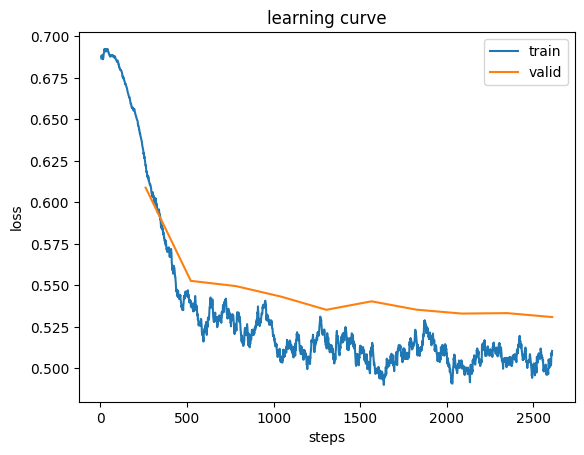

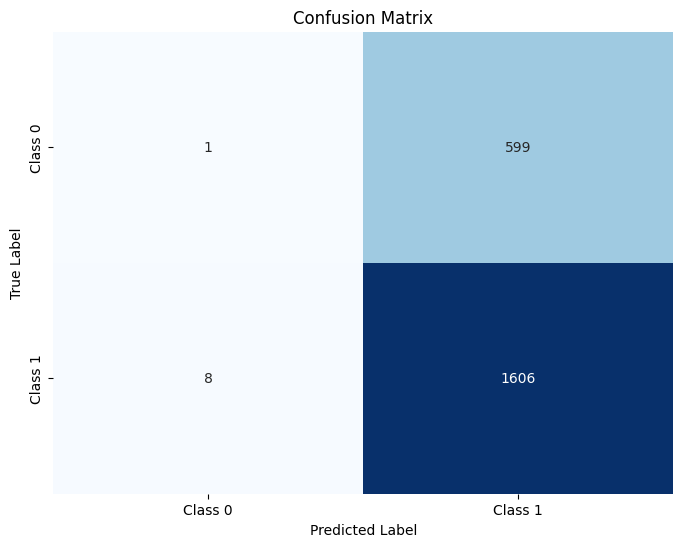

In [10]:

'''MY DATA'''
train_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_train.npy")
train_data = np.load(train_dir, allow_pickle=True)
# train_data = pd.DataFrame(train_data)
test_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_test.npy")
test_data = np.load(test_dir, allow_pickle=True)
# test_data = pd.DataFrame(test_data)
print(len(train_data))
print(len(test_data))
print(train_data[0])
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.utils.class_weight import compute_class_weight

from collections import Counter

# Example dataset with windows and labels
train_windows, train_labels = create_time_windows_with_labels(train_data)
test_windows, test_labels = create_time_windows_with_labels(test_data)

# Count label distribution
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)

# Print the counts
print("Train label distribution:")
print(f"  Term (0): {train_label_counts[0]}")
print(f"  Preterm (1): {train_label_counts[1]}")

print("\nTest label distribution:")
print(f"  Term (0): {test_label_counts[0]}")
print(f"  Preterm (1): {test_label_counts[1]}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Convert to tensors
train_windows_tensor = torch.tensor(train_windows, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)
test_windows_tensor = torch.tensor(test_windows, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32)

train_windows_tensor = train_windows_tensor.unsqueeze(1)  # (1071, 1, 12000)
test_windows_tensor = test_windows_tensor.unsqueeze(1)    # (899, 1, 12000)

train_labels_tensor = train_labels_tensor.long()
test_labels_tensor = test_labels_tensor.long()


print(train_labels_tensor.shape)

train_dataset = TensorDataset(train_windows_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_windows_tensor, test_labels_tensor)

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



'''CROSSENTROPY LOSS'''
from tsai.models import ResNet
from tsai.models.ResNet import ResNet
from fastai.metrics import accuracy
from fastai.data.core import DataLoaders
from fastai.learner import Learner
import torch

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Wrap your DataLoaders and set device
dls = DataLoaders.from_dsets(
    train_dataset,
    test_dataset,
    bs=32,
    shuffle=True,
    num_workers=0  # avoid multiprocessing issues
)
# Define model
model = ResNet(1, 2)

# Create Learner
learn = Learner(dls, model, loss_func=torch.nn.CrossEntropyLoss(), metrics=accuracy)

# Optionally convert model to FP32 (if it was FP16 before), and ensure model is on correct device
learn.model.to(device)

learn.dls.to(device)
# Train
learn.fit_one_cycle(10, 1e-5)


learn.recorder.plot_loss()  # Plot loss curves (training and validation loss)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

# Get predictions and true labels
preds, targs = learn.get_preds(dl=learn.dls.valid)

# Convert predictions to class labels (argmax for multi-class classification)
pred_labels = preds.argmax(dim=1)

# Compute confusion matrix
cm = confusion_matrix(targs, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



684
174
{'record_name': 'Hopper-2023_03_06_19_35_18-0000010181-0000-chan0', 'signal': array([[30.26377405],
       [51.72742573],
       [38.71189734],
       ...,
       [-1.23572809],
       [ 2.92797998],
       [-4.08031036]]), 'fs': 20, 'preterm': 0}
Train label distribution:
  Term (0): 2094
  Preterm (1): 2094

Test label distribution:
  Term (0): 600
  Preterm (1): 600
torch.Size([4188])


epoch,train_loss,valid_loss,accuracy,time
0,0.704462,0.702620,0.500000,00:04
1,0.671661,0.668629,0.626667,00:04
2,0.654073,0.659858,0.613333,00:04
3,0.648639,0.661403,0.619167,00:04
4,0.640343,0.658601,0.612500,00:04
5,0.631921,0.660640,0.622500,00:04
6,0.629921,0.649127,0.628333,00:04
7,0.621709,0.636732,0.650000,00:04
8,0.610339,0.638062,0.659167,00:04
9,0.603157,0.635728,0.666667,00:04


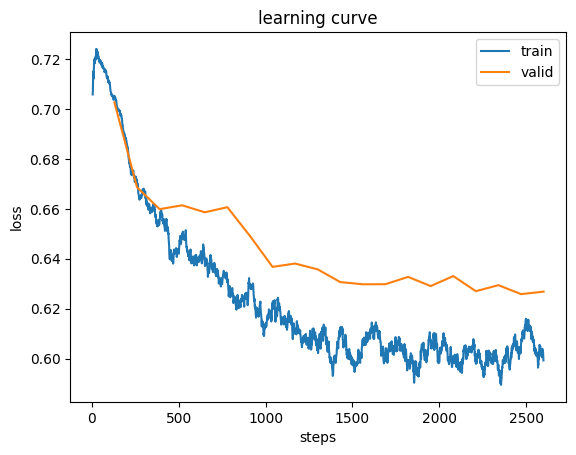

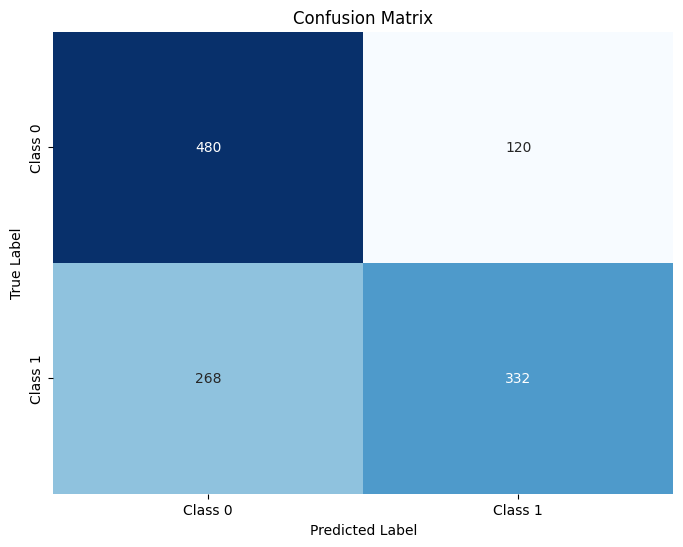

In [12]:
'''BALANCED DATA NO PCA'''

'''MY DATA'''
train_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_train.npy")
train_data = np.load(train_dir, allow_pickle=True)
# train_data = pd.DataFrame(train_data)
test_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_test.npy")
test_data = np.load(test_dir, allow_pickle=True)
# test_data = pd.DataFrame(test_data)
print(len(train_data))
print(len(test_data))
print(train_data[0])
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.utils.class_weight import compute_class_weight

from collections import Counter

# Example dataset with windows and labels
train_windows, train_labels = create_time_windows_with_labels(train_data)
test_windows, test_labels = create_time_windows_with_labels(test_data)



import numpy as np

# Convert to numpy for easy indexing
train_windows = np.array(train_windows)
train_labels = np.array(train_labels)

# Get indices for each class
term_indices = np.where(train_labels == 0)[0]
preterm_indices = np.where(train_labels == 1)[0]

# Undersample the majority class (preterm) to match term
n_samples = min(len(term_indices), len(preterm_indices))
balanced_term_indices = np.random.choice(term_indices, n_samples, replace=False)
balanced_preterm_indices = np.random.choice(preterm_indices, n_samples, replace=False)

# Combine and shuffle
balanced_train_indices = np.concatenate([balanced_term_indices, balanced_preterm_indices])
np.random.shuffle(balanced_train_indices)

# Subset
train_windows_balanced = train_windows[balanced_train_indices]
train_labels_balanced = train_labels[balanced_train_indices]

test_windows = np.array(test_windows)
test_labels = np.array(test_labels)

term_indices = np.where(test_labels == 0)[0]
preterm_indices = np.where(test_labels == 1)[0]

n_samples = min(len(term_indices), len(preterm_indices))
balanced_term_indices = np.random.choice(term_indices, n_samples, replace=False)
balanced_preterm_indices = np.random.choice(preterm_indices, n_samples, replace=False)

balanced_test_indices = np.concatenate([balanced_term_indices, balanced_preterm_indices])
np.random.shuffle(balanced_test_indices)

test_windows_balanced = test_windows[balanced_test_indices]
test_labels_balanced = test_labels[balanced_test_indices]

train_windows = train_windows_balanced
train_labels = train_labels_balanced
test_windows = test_windows_balanced
test_labels = test_labels_balanced


# Count label distribution
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)



# Print the counts
print("Train label distribution:")
print(f"  Term (0): {train_label_counts[0]}")
print(f"  Preterm (1): {train_label_counts[1]}")

print("\nTest label distribution:")
print(f"  Term (0): {test_label_counts[0]}")
print(f"  Preterm (1): {test_label_counts[1]}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Convert to tensors
train_windows_tensor = torch.tensor(train_windows, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)
test_windows_tensor = torch.tensor(test_windows, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32)

train_windows_tensor = train_windows_tensor.unsqueeze(1)  # (1071, 1, 12000)
test_windows_tensor = test_windows_tensor.unsqueeze(1)    # (899, 1, 12000)

train_labels_tensor = train_labels_tensor.long()
test_labels_tensor = test_labels_tensor.long()


print(train_labels_tensor.shape)

train_dataset = TensorDataset(train_windows_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_windows_tensor, test_labels_tensor)

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



'''CROSSENTROPY LOSS'''
from tsai.models import ResNet
from tsai.models.ResNet import ResNet
from fastai.metrics import accuracy
from fastai.data.core import DataLoaders
from fastai.learner import Learner
import torch

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Wrap your DataLoaders and set device
dls = DataLoaders.from_dsets(
    train_dataset,
    test_dataset,
    bs=32,
    shuffle=True,
    num_workers=0  # avoid multiprocessing issues
)
# Define model
model = ResNet(1, 2)

# Create Learner
learn = Learner(dls, model, loss_func=torch.nn.CrossEntropyLoss(), metrics=accuracy)

# Optionally convert model to FP32 (if it was FP16 before), and ensure model is on correct device
learn.model.to(device)

learn.dls.to(device)
# Train
learn.fit_one_cycle(20, 1e-5)


learn.recorder.plot_loss()  # Plot loss curves (training and validation loss)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

# Get predictions and true labels
preds, targs = learn.get_preds(dl=learn.dls.valid)

# Convert predictions to class labels (argmax for multi-class classification)
pred_labels = preds.argmax(dim=1)

# Compute confusion matrix
cm = confusion_matrix(targs, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

